# ROUND 6

In [36]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model

In [37]:
nums = pd.read_csv('nums.csv')

y = pd.read_csv('y.csv')

nums_s = pd.read_csv('nums_s.csv')
nums_m = pd.read_csv('nums_m.csv')

cats = pd.read_csv('cats.csv')
cats = cats.drop(['customer'], axis=1)

dates = pd.read_csv('dates.csv')

y


,total_claim_amount
0,292.800000
1,744.924331
2,480.000000
3,484.013411
4,707.925645
...,...
10905,1214.400000
10906,273.018929
10907,381.306996
10908,618.288849


In [38]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
from sklearn.preprocessing import OneHotEncoder

onehot_encoded_cats = pd.DataFrame([])
for col in cats.columns:                        # cats is my DataFrame of dtype = object
    # drop first column
    encoder = OneHotEncoder(drop='first').fit(pd.DataFrame(cats[col]))
    encoded_col = encoder.transform(pd.DataFrame(cats[col])).toarray()
    # exclude first colum [1:]
    cols = encoder.categories_[0][1:]
    encoded_col = pd.DataFrame(encoded_col, columns=cols)
    onehot_encoded_cats = pd.concat((onehot_encoded_cats , encoded_col), axis=1)
onehot_encoded_cats

,California,Nevada,Oregon,Unknown,Washington,Yes,Extended,Premium,College,Doctor,...,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small,B
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10906,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10907,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
10908,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [39]:
# working with the minmax data

X = pd.concat((nums_m, onehot_encoded_cats), axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,California,Nevada,Oregon,...,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small,B
0,-0.466105,0.345635,-0.934819,-0.698755,0.139877,-0.406656,2.509455,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.840946,-1.236462,-0.847713,-1.083209,-0.790709,-0.406656,-0.824922,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.006523,-0.507194,0.197554,1.896304,-0.611750,-0.406656,-0.408125,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2.079112,0.380189,0.110448,-0.410415,-1.613919,-0.406656,-0.408125,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.146240,-0.456597,0.691152,-1.371549,-0.611750,-0.406656,1.675860,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,1.095916,-1.236462,4.639940,-1.371549,-0.289625,-0.406656,1.675860,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10906,-0.400710,0.777715,-0.818678,-0.698755,0.712545,-0.406656,1.259063,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10907,2.305825,0.075787,3.130109,-0.314302,0.533586,-0.406656,-0.408125,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
10908,0.574273,0.878150,1.881595,-1.371549,-0.754917,4.087257,1.259063,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [40]:
from sklearn.model_selection import train_test_split      # random_state is seed for shuffle

In [53]:
# model with all of the data
def fill_model_data(inputs, ouputs):
    datadict = {}
    datadict['X_train'], datadict['X_test'], datadict['y_train'], datadict['y_test'] = train_test_split(inputs, ouputs, test_size=0.2, random_state=42)
    return datadict

lm = linear_model.LinearRegression()

lm_data = fill_model_data(X, y)

lm.fit(lm_data['X_train'], lm_data['y_train'])

LinearRegression()

In [54]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lm_data['pred_test'] = lm.predict(lm_data['X_test'])

In [64]:
def eval_preds(data_model):
    r2 = r2_score(data_model['y_test'], data_model['pred_test'])
    mse = mean_squared_error(data_model['y_test'], data_model['pred_test'])
    rmse = np.sqrt(mean_squared_error(data_model['y_test'], data_model['pred_test']))
    mae = mean_absolute_error(data_model['y_test'], data_model['pred_test'])

    print(f"r2  : {r2}")
    print(f"mse  : {mse}")
    print(f"rmse  : {rmse}")
    print(f"mae  : {mae}")

In [65]:
eval_preds(lm_data)

r2  : 0.7688929223603782
mse  : 18660.272970642618
rmse  : 136.60260967727746
mae  : 95.36710668372473


# ROUND 7

In [68]:
# drop the numerical columns with low correlation (ROUND 4)
X2 = X.drop(['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies'], axis=1)

lm2 = linear_model.LinearRegression()
lm2_data = fill_model_data(X2, y)
lm2.fit(lm2_data['X_train'], lm2_data['y_train'])
lm2_data['pred_test'] = lm2.predict(lm2_data['X_test'])
eval_preds(lm2_data)

# errors are almost the same (even a little lower), so dropping the columns seems okay because it has low influence


r2  : 0.768995581486197
mse  : 18651.98396742267
rmse  : 136.57226646513072
mae  : 95.43509091183873


In [214]:
def fit_and_try(inputs):
    global y #ugly and not necessary
    lm = linear_model.LinearRegression()
    lm_data = fill_model_data(inputs, y)
    lm.fit(lm_data['X_train'], lm_data['y_train'])
    lm_data['pred_test'] = lm.predict(lm_data['X_test'])
    eval_preds(lm_data)

In [213]:
fit_and_try(X)

r2  : 0.7688929223603782
mse  : 18660.272970642618
rmse  : 136.60260967727746
mae  : 95.36710668372473


In [72]:
fit_and_try(X2)

r2  : 0.768995581486197
mse  : 18651.98396742267
rmse  : 136.57226646513072
mae  : 95.43509091183873


In [ ]:
### CORRELATION r

# r < 0.1 - Very small

# 0.1 <= r < 0.3 - Small

# 0.3 <= r < 0.5 - Moderate

# r >= 0.5 - Large

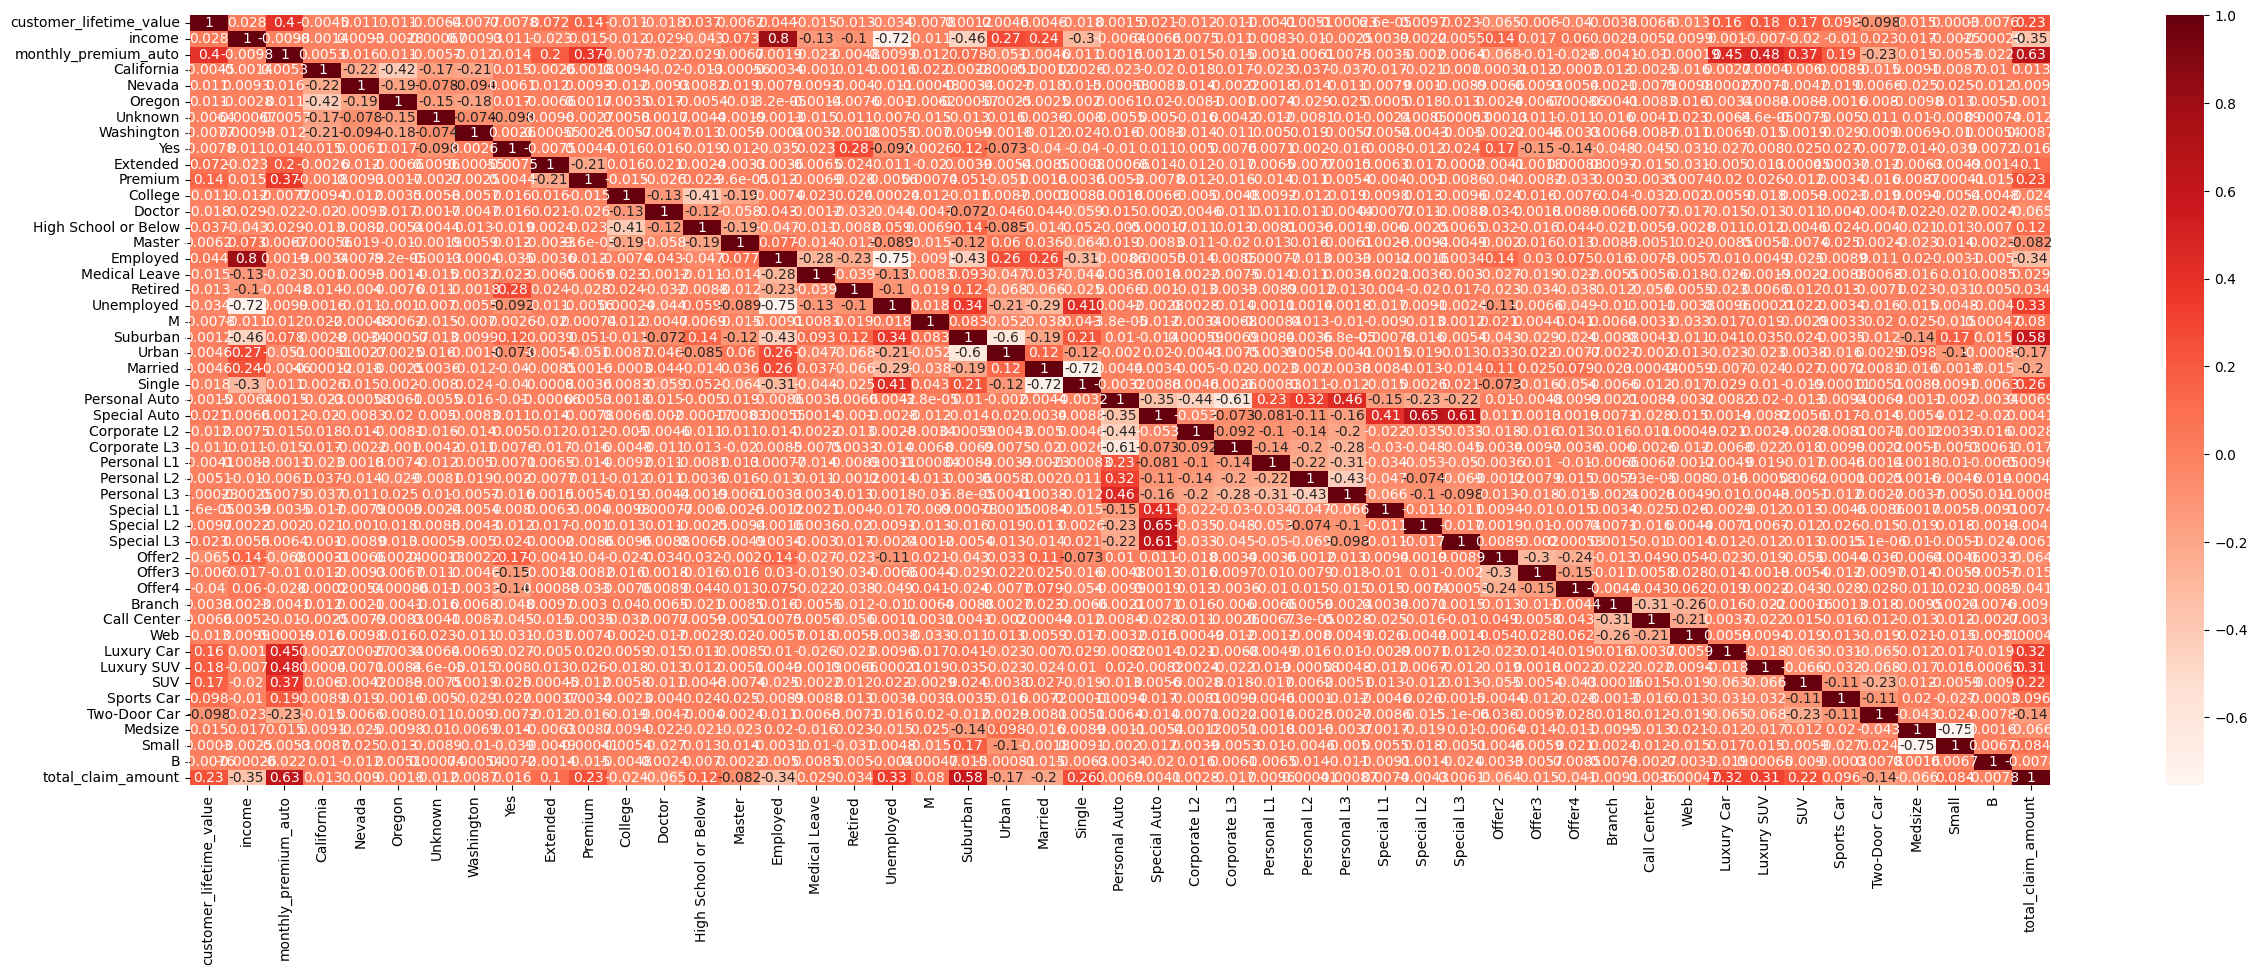

10910

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

lala = pd.concat((X2, y), axis=1)
mat = lala.corr()
plt.figure(figsize=(30,10))
sns.heatmap(mat, annot=True, cmap='Reds')
plt.show()

# likely important after reviewing heatmap: 'Luxury Car', 'Luxury SUV', 'SUV', 'Premium', 'Small', 
#                                           'High School or Below', 'Unemployed', 'Suburban', 'Single'

In [165]:
X3 = X2[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'Luxury Car', 'Luxury SUV', 'SUV', 'Premium', 'Small', 'High School or Below', 'Unemployed', 'Suburban', 'Single']]
fit_and_try(X3)

r2  : 0.7172004701183012
mse  : 22834.075344896202
rmse  : 151.1094813203202
mae  : 109.60843251064311


In [132]:
# working with standardized vals

X4 = pd.concat((nums_s, onehot_encoded_cats), axis=1)
fit_and_try(X4)    # sliiiiiiiiiiighty less r2 than with minmax

r2  : 0.7688892281128035
mse  : 18660.571255181836
rmse  : 136.60370146954963
mae  : 95.36960609129113


In [134]:
#only taking the low correlation numericals haahahahaha

X5 = X[['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']]
fit_and_try(X5) 

r2  : 0.0007329400953758336
mse  : 80683.79514308278
rmse  : 284.04893089586307
mae  : 206.77500401150849


In [149]:
# combining standardized and undcorrelated numericals

X6 = X4.drop(['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies'], axis=1)
fit_and_try(X6)

r2  : 0.7689936640661409
mse  : 18652.138785622148
rmse  : 136.5728332635087
mae  : 95.43436047097747


In [177]:
# last try: working with log-transforming instead of normalizing

def log_transform_NAN(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

In [211]:
# flling with zeros

X7 = nums[['customer_lifetime_value', 'income', 'monthly_premium_auto']].copy()
#X7 = pd.concat((X7, X2[['Luxury Car', 'Luxury SUV', 'SUV', 'Premium', 'Small', 'High School or Below', 'Unemployed', 'Suburban', 'Single']]), axis=1)

X7['customer_lifetime_value'] = list(map(log_transform_NAN, X7['customer_lifetime_value']))
X7['customer_lifetime_value'] = X7['customer_lifetime_value'].fillna(0)

X7['income'] = list(map(log_transform_NAN, X7['income']))
X7['income'] = X7['income'].fillna(0)

X7['monthly_premium_auto'] = list(map(log_transform_NAN, X7['monthly_premium_auto']))
X7['monthly_premium_auto'] = X7['monthly_premium_auto'].fillna(0)

/tmp/ipykernel_36027/3676593294.py:11: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


In [210]:
# filling with mean

X8 = nums[['customer_lifetime_value', 'income', 'monthly_premium_auto']].copy()
#X8 = pd.concat((X8, X2[['Luxury Car', 'Luxury SUV', 'SUV', 'Premium', 'Small', 'High School or Below', 'Unemployed', 'Suburban', 'Single']]), axis=1)

X8['customer_lifetime_value'] = list(map(log_transform_NAN, X8['customer_lifetime_value']))
X8['customer_lifetime_value'] = X8['customer_lifetime_value'].fillna(np.mean(X8['customer_lifetime_value']))

X8['income'] = list(map(log_transform_NAN, X8['income']))
X8['income'] = X8['income'].fillna(np.mean(X8['income']))

X8['monthly_premium_auto'] = list(map(log_transform_NAN, X8['monthly_premium_auto']))
X8['monthly_premium_auto'] = X8['monthly_premium_auto'].fillna(np.mean(X8['monthly_premium_auto']))

/tmp/ipykernel_36027/3676593294.py:11: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


In [202]:
fit_and_try(X7)

r2  : 0.7074192229862435
mse  : 23623.84233663727
rmse  : 153.70049556405883
mae  : 111.01785416646004


In [203]:
fit_and_try(X8)                                             ##### no difference

r2  : 0.7074192229862435
mse  : 23623.84233663727
rmse  : 153.70049556405883
mae  : 111.01785416645991


## hard to improve initial model, only when leaving out low correlated numericals, it gets better a tiny little bit